#### Alon Mikulincer
<br>

### Final project in the class: Information-theoretic analysis of neural language models
#### Recihman University, Fall 2022-2023

anlysis of api sequences, by using nlp algorithms and methods for a task of classifying program as malicious or benign
we show the first method (as demonstrated in a recent paper), which uses MCD (Markov Chain Detector) as the underlying method for the classification.

then we implement a version of a transofermers based algorithm (similiar to BERT) and using it for the classification task



### intro

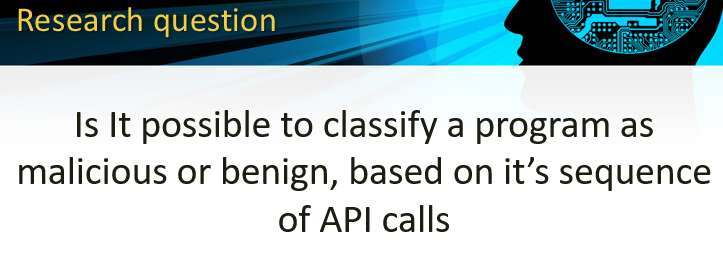

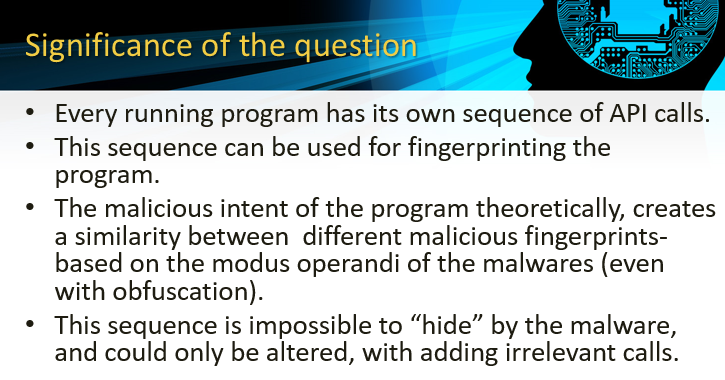

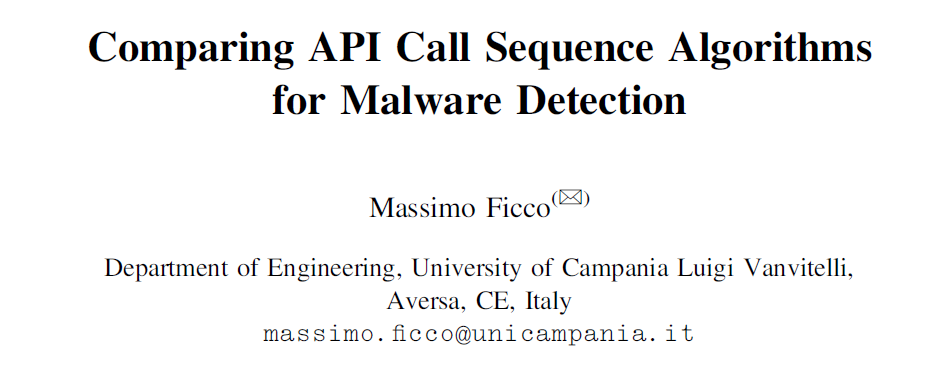

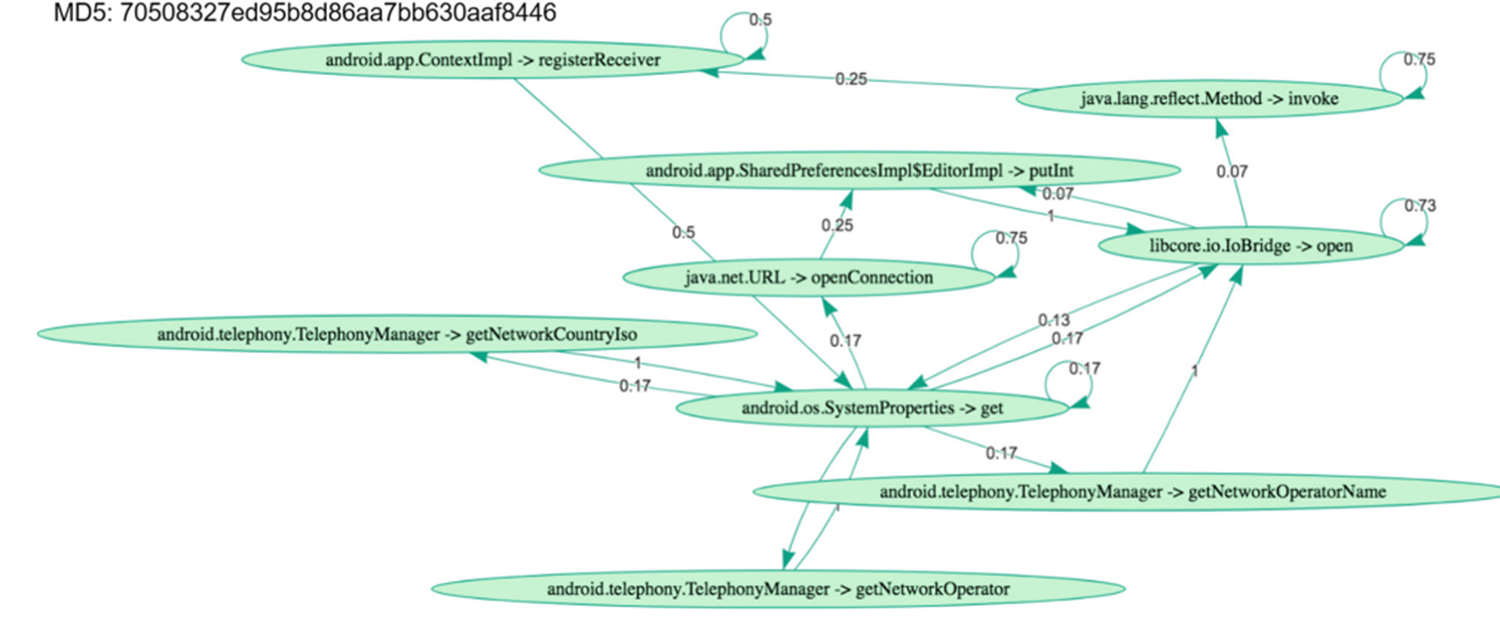

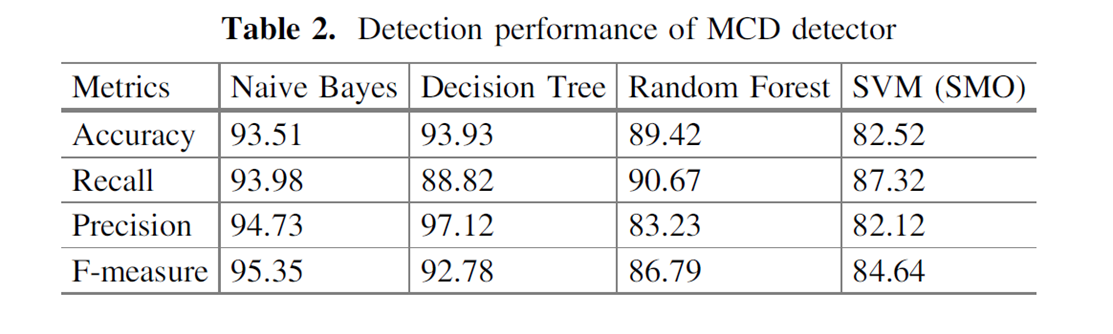

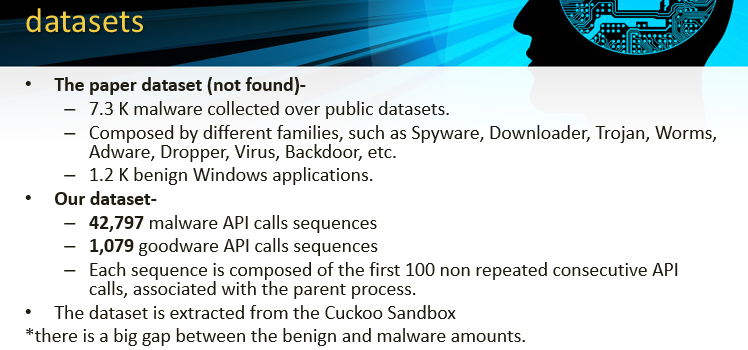

### running the papaer solution on our dataset

Importing libraries

In [2]:
import torch
import numpy as np
import math
import torch.nn.functional as F
from csv import DictReader
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

Initializing the transition matrices( counts, and probabilities)

In [3]:
transition_Matrix_Benign = torch.zeros(307,307)
transition_Matrix_Malware = torch.zeros(307,307)

transition_Matrix_Benign_Probabilities = torch.zeros(307,307)
transition_Matrix_Malware_Probabilities = torch.zeros(307,307)

benign_count = 0
malware_count = 0

benign_prob = 0
malware_prob = 0

Filling the transition count matrices by running on the training data and counting the amount of each transition, and while running we count how many benign and how many malware sequences do we have 

In [4]:
def calcTransitionMatrix(data):
  # 2 to 102
  for row in range(data.shape[0]):
    if(data.iat[row,102] == 1):
      global malware_count
      malware_count+=1
      for col in range(2, 101):
        transition_Matrix_Malware[data.iat[row,col],data.iat[row,col+1]]+=1

    if(trainData.iat[row,102] == 0):
      global benign_count
      benign_count += 1
      for col in range(2, 101):
        transition_Matrix_Benign[data.iat[row,col],data.iat[row,col+1]]+=1
  

Opening the training data file and calling the function above

In [8]:
path = "./"

In [9]:
trainData = pd.read_csv(path + 'APIseqTrain.csv')
testData = pd.read_csv(path + 'APIseqTest.csv')

FileNotFoundError: [Errno 2] No such file or directory: './APIseqTrain.csv'

In [ ]:
calcTransitionMatrix(trainData)

Over here we save the transition count matrices on the drive

In [6]:
torch.save(transition_Matrix_Benign,'transition_matrix_benign.torch')
torch.save(transition_Matrix_Malware,'transition_matrix_malware.torch')

torch.save(benign_count,'benign_count.torch')
torch.save(malware_count,'malware_count.torch')

Over here we download our saved/pre-calculation over the training data (we can see that we have 4 links but so far we saved 2, we will save the probabilities after we normalize the first 2 matrices which will happen later) 

In [ ]:
!gdown --id '19lS07XyH4kavV6FGTBV3EzRI6VsscSph'
!gdown --id '1-1HlpUOvQM-nVV3W9ZzK57bH3gnyAH8D'


!gdown --id '1-4wo0HzEPDff1bnSe1GKolPvsrCB1XCm'
!gdown --id '1-3pTb_RxO1OoOpFxQDp7HVbvrQXv6AYO'

!gdown --id '1-7cUDTw5zR9nM8PUY7xsoJgVUAGDfrQ1'
!gdown --id '1-7B76JqXmbq2TfAj3dXc5MJXemwie8aU'

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19lS07XyH4kavV6FGTBV3EzRI6VsscSph
To: /content/transition_matrix_malware.torch
100% 378k/378k [00:00<00:00, 119MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-1HlpUOvQM-nVV3W9ZzK57bH3gnyAH8D
To: /content/transition_matrix_benign.torch
100% 378k/378k [00:00<00:00, 153MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
Fro

Over here we load our pre calculations over the training data

In [ ]:
transition_Matrix_Benign = torch.load('/content/transition_matrix_benign.torch')
transition_Matrix_Malware = torch.load('/content/transition_matrix_malware.torch')


benign_count = torch.load('/content/benign_count.torch')
malware_count = torch.load('/content/malware_count.torch')


transition_Matrix_Benign_Probabilities = torch.load('/content/transition_matrix_benign_probabilities.torch')
transition_Matrix_Malware_Probabilities = torch.load('/content/transition_matrix_malware_probabilities.torch')

benign_prob = (benign_count)/(benign_count+malware_count)
malware_prob = (malware_count)/(benign_count+malware_count)


Over here we normailize the transition matrices and get the probabilities of each transition(for benign and malware)

In [ ]:
transition_sum = trainData.shape[0] * 99

for i in range(transition_Matrix_Benign.shape[0]):
    for j in range(transition_Matrix_Benign.shape[1]):
        transition_Matrix_Benign_Probabilities[i,j] = (transition_Matrix_Benign[i,j]/transition_sum)/benign_prob

for i in range(transition_Matrix_Malware.shape[0]):
    for j in range(transition_Matrix_Malware.shape[1]):
        transition_Matrix_Malware_Probabilities[i,j] = (transition_Matrix_Malware[i,j]/transition_sum)/malware_prob

#add 1/transition_sum to disable the case that the cell equals 0
transition_Matrix_Malware_Probabilities = torch.add(transition_Matrix_Malware_Probabilities,1/(transition_sum))
transition_Matrix_Benign_Probabilities = torch.add(transition_Matrix_Benign_Probabilities,1/(transition_sum))


And here we save the probabilities after normalizing

In [ ]:
torch.save(transition_Matrix_Benign, '/content/transition_matrix_benign_probabilities.torch')
torch.save(transition_Matrix_Malware, '/content/transition_matrix_malware_probabilities.torch')

In [ ]:
def predict(seq,label):
  prob_mal = 1
  prob_ben = 1
  for col in range(seq.size-1):
    MalCur = transition_Matrix_Malware_Probabilities[seq[col],seq[col+1]]
    BenCur = transition_Matrix_Benign_Probabilities[seq[col],seq[col+1]]
    prob_mal *= MalCur.item()
    prob_ben *= BenCur.item()
  prob_mal = prob_mal * malware_prob
  prob_ben = prob_ben * benign_prob
  #return the prediction according to the bigger probability of class
  return int(prob_mal >= prob_ben)


In [ ]:
def evaluate(data):
  #the predictions list
  preds = []
  #the ground truth list
  test = []
  for index, row in data.iterrows():
    #extract the current sequence itself
    seq  = row[2:102]
    label = row['malware']
    test.append(label)
    pred  = predict(seq)
    preds.append(pred)
  #calculate the f1 recall precision and accuracy
  f1 = f1_score(test, preds, average='macro')
  precision = precision_score(test, preds, average='macro')
  recall = recall_score(test, preds, average='macro')
  accuracy = accuracy_score(test, preds)
  
  return [f1, precision, recall, accuracy]

In [ ]:

#testData = pd.read_csv(pathTest)
results = evaluate(testData)

#insert all of the collected results to a table so we can present it in a simple manner
df = pd.DataFrame([results],index = ['naive bayes'],columns =['f1','recall', 'precision','Accuracy'], dtype = float) 
print(df)
display(df)

                   f1    recall  precision  Accuracy
naive bayes  0.614091  0.583171   0.863709  0.896992


,f1,recall,precision,Accuracy
naive bayes,0.614091,0.583171,0.863709,0.896992


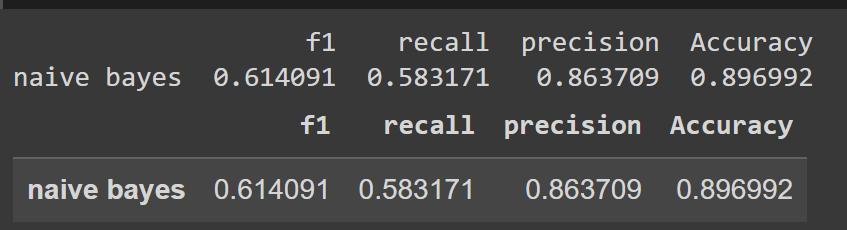

# anomaly detection

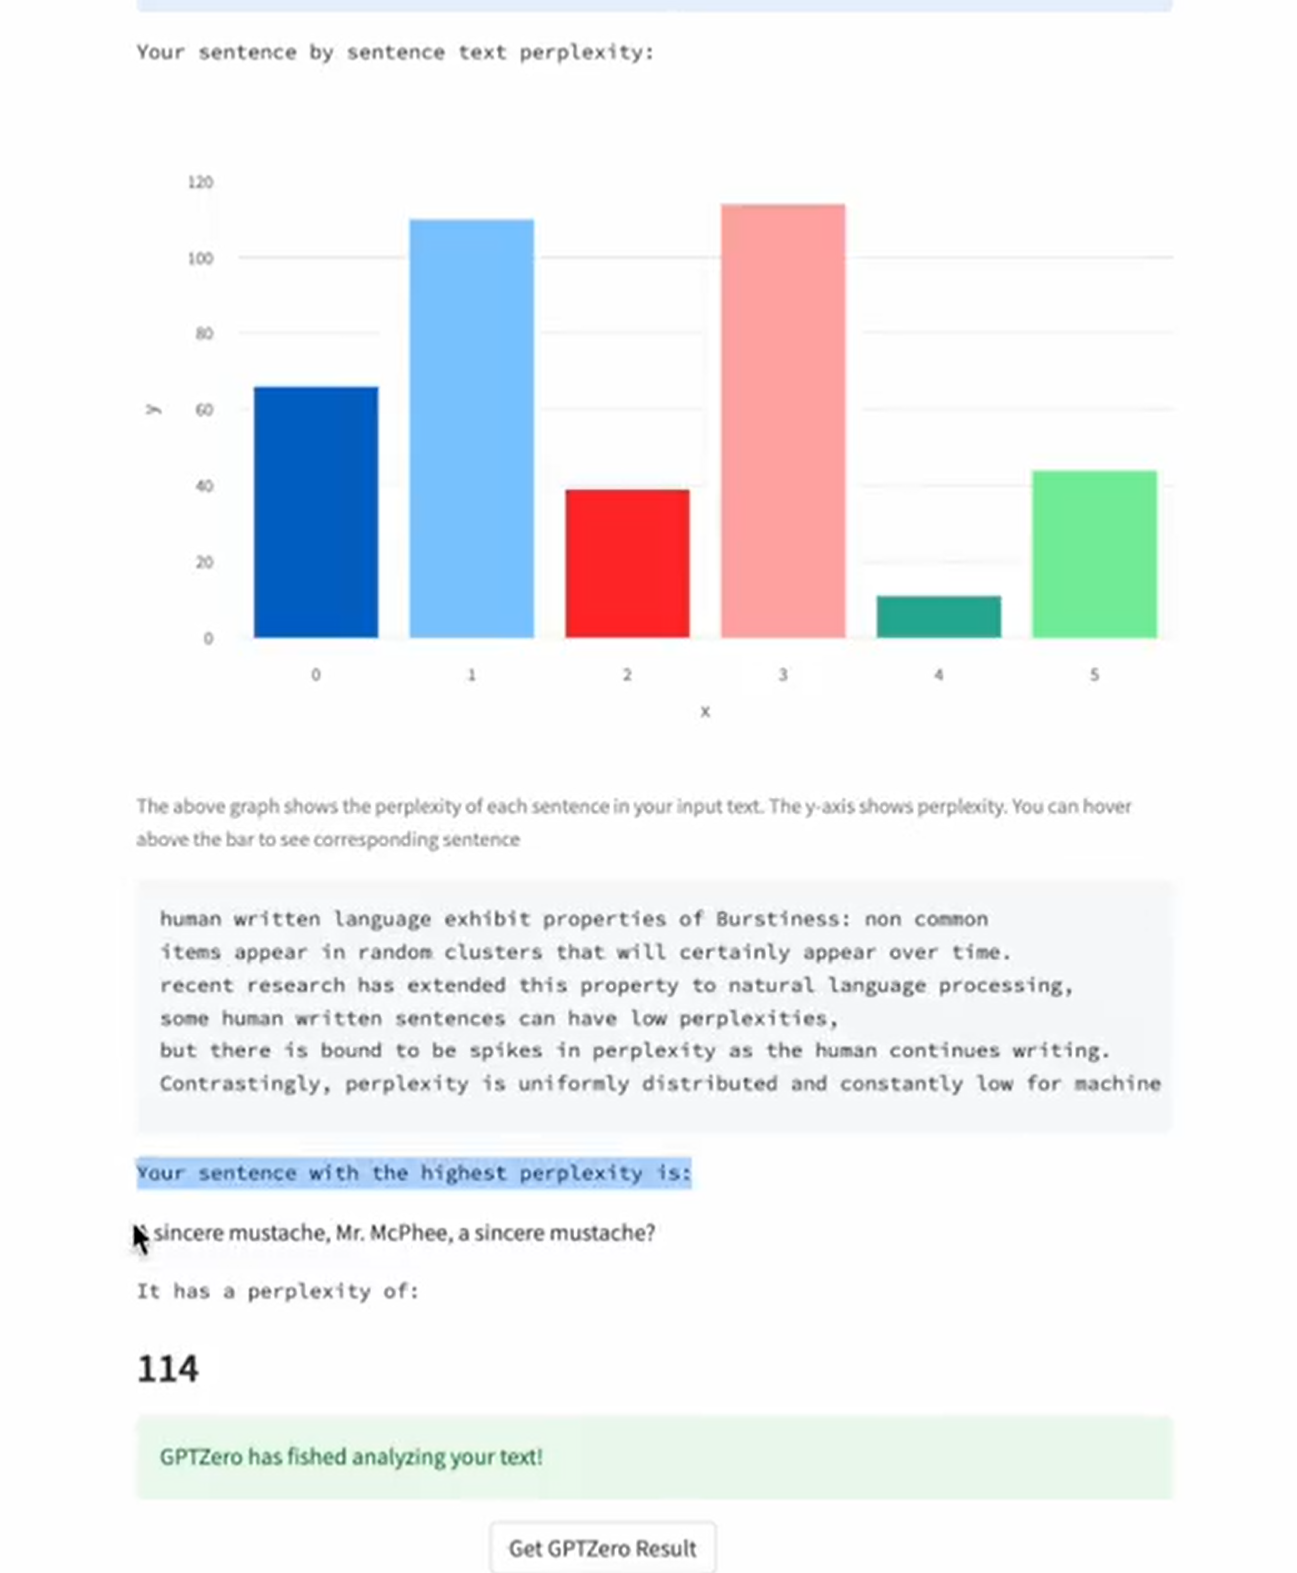

In [ ]:
def evaluate_anomaly(data,mal):
  #the predictions list
  preds_ben = []
  preds_mal = []
  #the ground truth list
  test = []
  for index, row in data.iterrows():
    #extract the current sequence itself
    seq  = row[2:102]
    label = row['malware']
    if mal==1:
      pred  = predict_anomaly2(seq)
    else:
      pred  = predict_anomaly(seq)
    if label==1:
      preds_mal.append(pred)
    else:
      preds_ben.append(pred)
  
  return preds_mal , preds_ben

In [ ]:
def predict_anomaly2(seq):
  prob_mal = 1
  for col in range(seq.size-1):
    MalCur = transition_Matrix_Malware_Probabilities[seq[col],seq[col+1]]
    prob_mal *= (MalCur.item()+0.0001)
  #return the prediction according to the bigger probability of class
  if (prob_mal==0):
    prob_mal=0.000001
  return -math.log(prob_mal)

In [ ]:
def predict_anomaly(seq):
  prob_ben = 1
  for col in range(seq.size-1):
    BenCur = transition_Matrix_Benign_Probabilities[seq[col],seq[col+1]]
    prob_ben *= (BenCur.item()+0.0001)
  #return the prediction according to the bigger probability of class
  if (prob_ben==0):
    prob_ben=0.000001
  return -math.log(prob_ben)

In [ ]:
transition_Matrix_Benign_Probabilities = torch.load('/content/transition_matrix_benign_probabilities.torch')
testData = pd.read_csv(path + 'APIseqTest.csv')
mal , ben = evaluate_anomaly(testData,0)

In [ ]:
transition_Matrix_Malware_Probabilities = torch.load('/content/transition_matrix_malware_probabilities.torch')
testData = pd.read_csv(path + 'APIseqTest.csv')
mal2 , ben2 = evaluate_anomaly(testData,1)

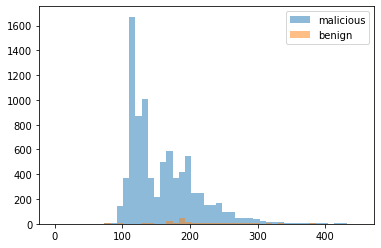

In [ ]:
from matplotlib import pyplot

bins = np.linspace(0,450, 50)

pyplot.hist(mal2, bins, alpha=0.5, label='malicious')
pyplot.hist(ben2, bins, alpha=0.5, label='benign')
pyplot.legend(loc='upper right')
pyplot.show()

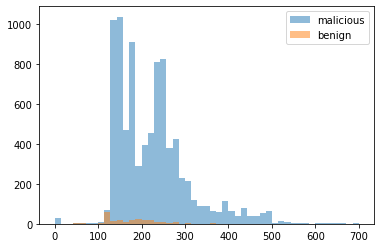

In [ ]:
from matplotlib import pyplot

bins = np.linspace(0,700, 50)

pyplot.hist(mal, bins, alpha=0.5, label='malicious')
pyplot.hist(ben, bins, alpha=0.5, label='benign')
pyplot.legend(loc='upper right')
pyplot.show()


# Bert approach

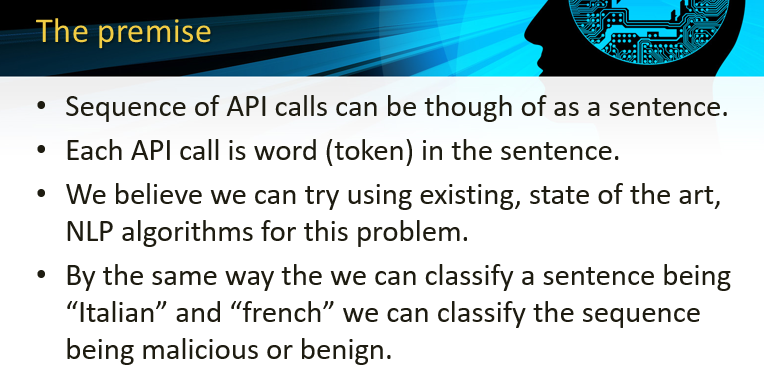

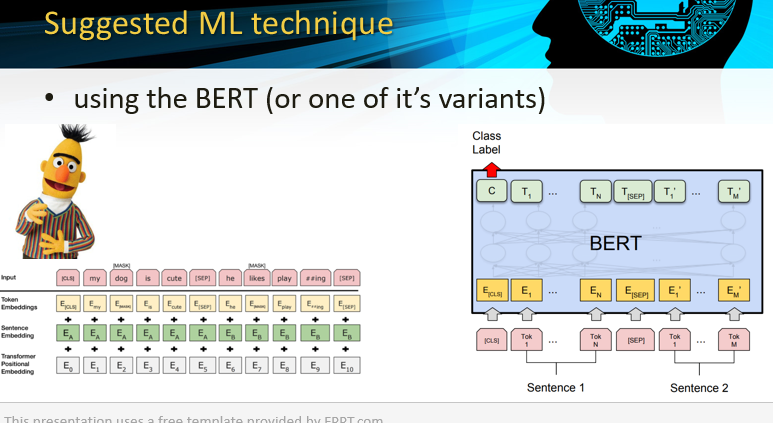

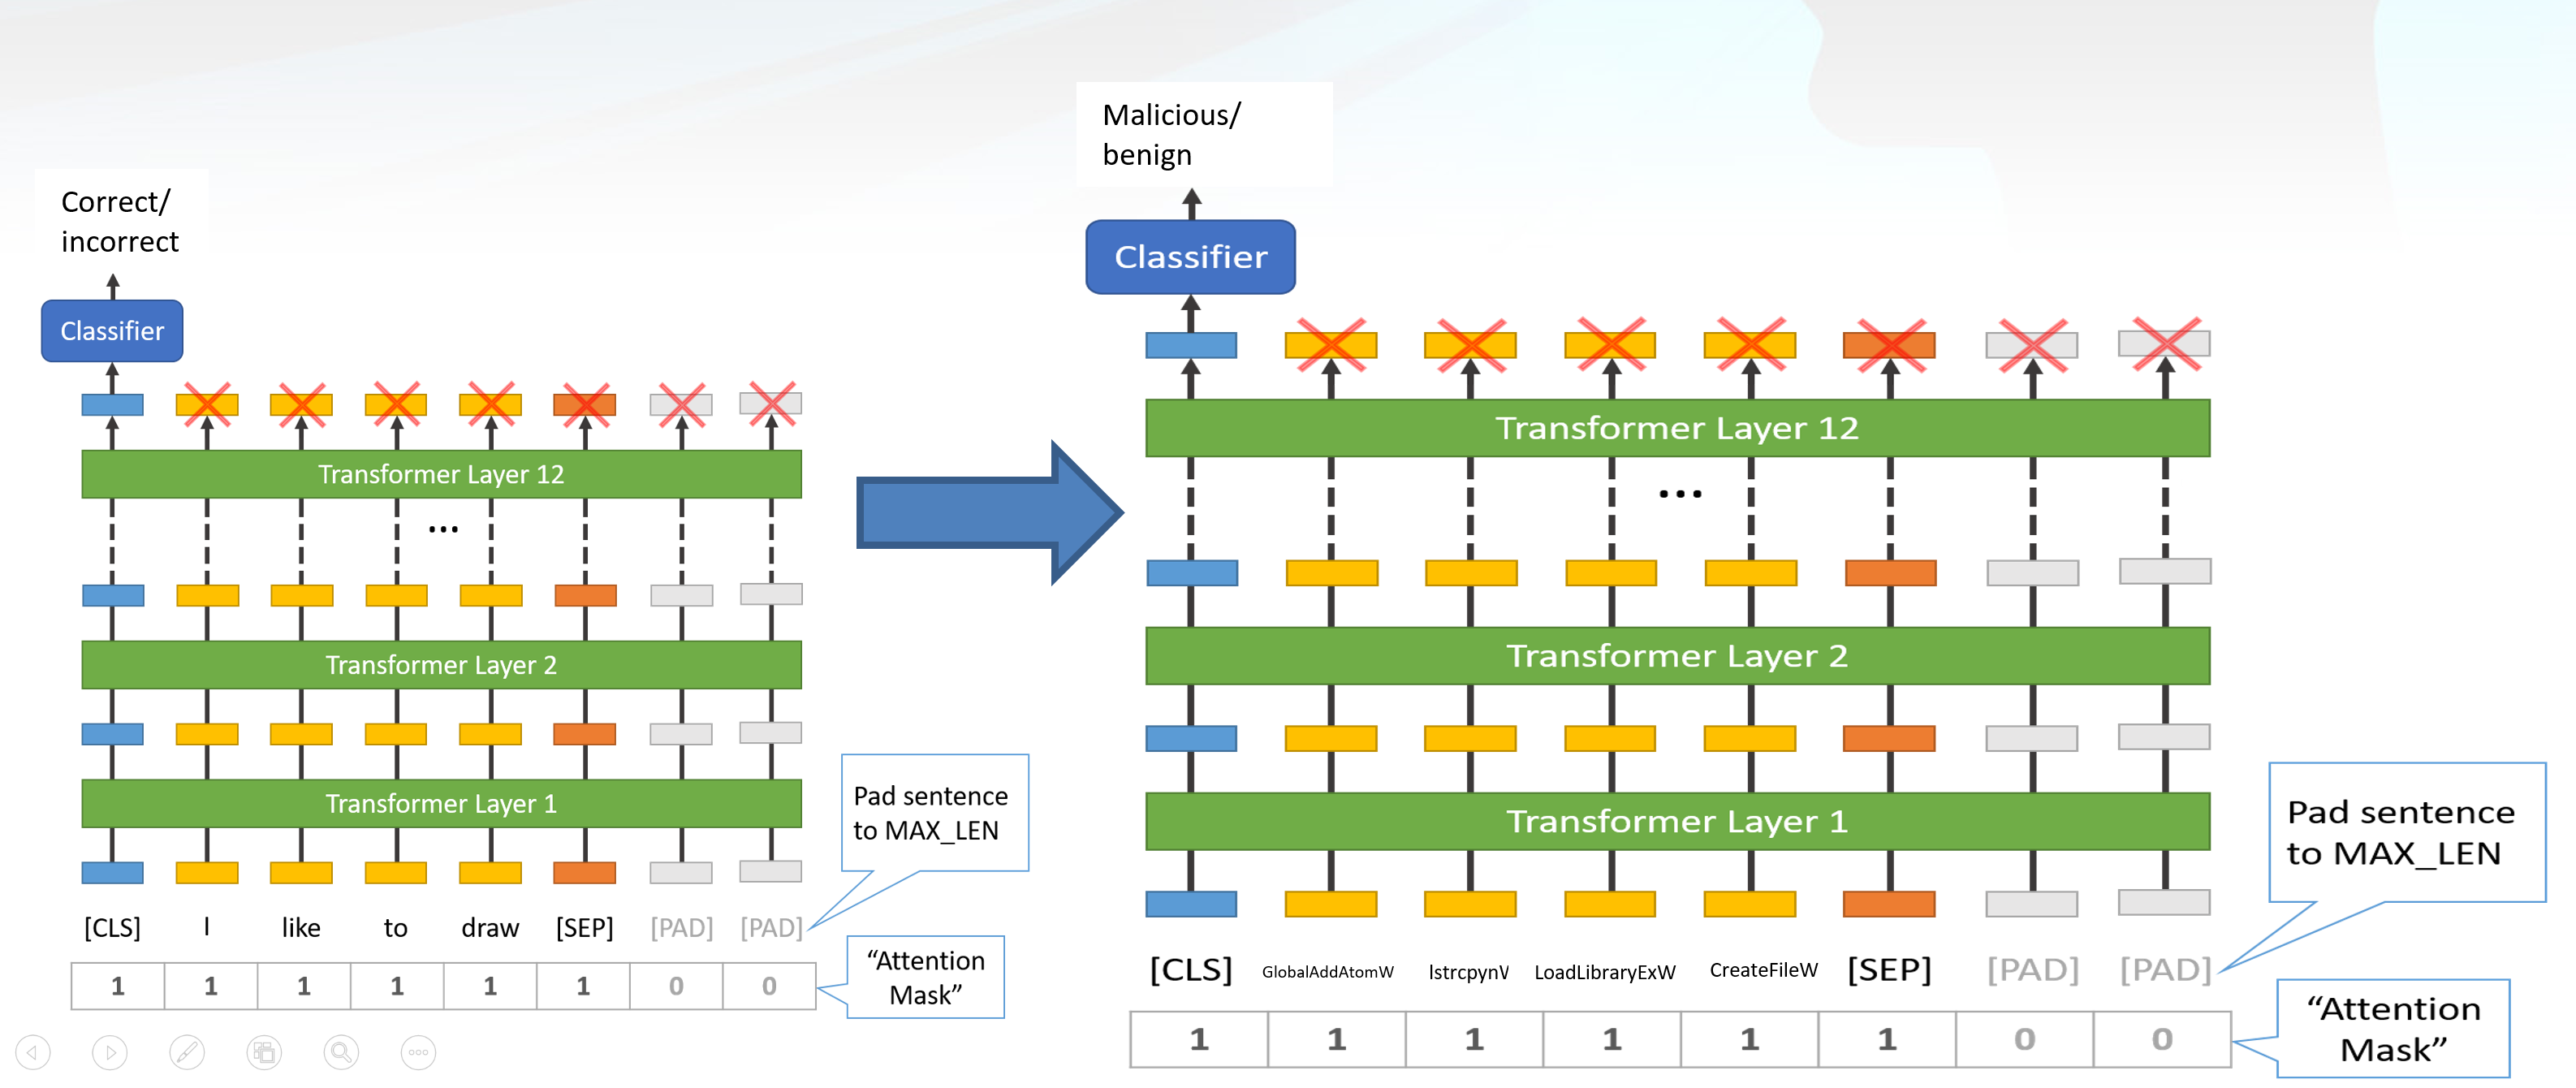

In [ ]:
pip install transformers

In [ ]:
import torch
import numpy as np
import math
from torch import autograd, nn, optim
import torch.nn.functional as F
from google.colab import drive
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertConfig
from transformers import AdamW
from transformers import AutoConfig
from sklearn.model_selection import train_test_split


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/api sequence

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


the training function- to be applied to train the DistilBERT model for the classification of API sequences
We use the already tokenized API calls from the provided dataset as tokens for the model, instead of using the povided Tokenizer of the model

In [ ]:
def trainModel (data,path,path2,original):
  #checks if this is the first trainig epoch or not
  if (original):
    # Initializing a DistilBERT configuration
    configuration = DistilBertConfig()
    #creating a new "clean" DistilBert - with randomized weights
    model = DistilBertForSequenceClassification(configuration)
  else:   
    model = DistilBertForSequenceClassification.from_pretrained(path)  
  #use cuda - accelerate the training and NN by using GPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  #a default mask for later on using in the teokanizations
  mask = torch.tensor([[1]*100])
  optimizer = AdamW(model.parameters(), lr=1e-5)
  
  #itereate over all of the training dataset provided
  for index,row in data.iterrows():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    optimizer.zero_grad()
    #extract the label of the current sequence
    label = row['malware']
    labels = (torch.tensor([label]).unsqueeze(0)).to(device)  # Batch size 1
    #extract the current sequence itself
    seq  = row[2:102]
    #create the inputs for the model in an "artificial" way
    #since the data provided is already "tokenized"
    inputs = torch.tensor([seq.values.astype(np.int)])
    inputs = inputs.to(device)
    inputs = {'input_ids': inputs, 'attention_mask': mask}
    inputs={key:inputs[key].to(device) for key in inputs}
    #insert the DistilBert model the inputs and the coorect labeling
    outputs = model(**inputs, labels=labels)
    #preform back propogation each iteration
    loss = outputs[0]
    loss.backward()
    optimizer.step()
  #save the model
  model.save_pretrained(path2)
  return model

The evaluate function - to be applied to test the already trained models for the classification of malicious and benign.
We evaluate 4 different parameters - F1, Recall, Precision and Accuracy

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def evaluate (data,model_path):
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  model = DistilBertForSequenceClassification.from_pretrained(model_path)
  model = model.to(device)

  mask = torch.tensor([[1]*100])
  #the predictions list
  preds = []
  #the ground truth list
  test = []
  for index, row in data.iterrows():
    #extract the current sequence itself
    seq  = row[2:102]
    label = row['malware']
    labels = (torch.tensor([label]).unsqueeze(0)).to(device)  # Batch size 1
    test.append(label)
    #create the inputs for the model in an "artificial" way
    #since the data provided is already "tokenized"
    inputs = torch.tensor([seq.values.astype(np.int)])
    inputs = inputs.to(device)
    inputs = {'input_ids': inputs, 'attention_mask': mask}
    inputs={key:inputs[key].to(device) for key in inputs}
    #run the model and get the prediction
    outputs = model(**inputs)
    outputs = F.softmax(outputs[0],dim=1)
    values, indices = torch.max(outputs,1)
    pred = indices.cpu().detach().numpy()[0]
    preds.append(pred)
  
  #calculate the f1 recall and precision
  f1 = f1_score(test, preds, average='macro')
  precision = precision_score(test, preds, average='macro')
  recall = recall_score(test, preds, average='macro')
  accuracy = accuracy_score(test, preds)
  
  return [f1, precision, recall, accuracy]

We load the dataset and split it into training and test datasets
We preform the split using the sklearn library, while saving 20 precents for the testing and 80 precents for the training

the emphesis here, is mostly about the proportional division to test and training with respect to the classes distribution in each datset.
it's highly important, since we have a big difference between the amount of malcious and benign samples (around 42K vs 1K)


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv(path + 'dynamic_api_call_sequence_per_malware_100_0_306.csv')
y = data['malware']
x = data[data.columns[0:101]] 
#split the data into testing and traning, while mantaining propotions of the classes
trainData, testData, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)
trainData['malware'] = y_train
testData['malware'] = y_test
print()
print('the proprotion of dividing to test and training')
print('# of malicious and benign in the traning set:')
print(trainData['malware'].value_counts())
print('# of malicious and benign in the testing set:')
print(testData['malware'].value_counts())

#save to new files
trainData.to_csv(path + 'APIseqTrain.csv')
testData.to_csv(path + 'APIseqTest.csv')


the proprotion of dividing to test and training
# of malicious and benign in the traning set:
1    34237
0      863
Name: malware, dtype: int64
# of malicious and benign in the testing set:
1    8560
0     216
Name: malware, dtype: int64


Train the DistilBERT model for 7 epoches, with the training dataset that was split last code block
After each training epoch, the model is saved in order to test the difference in the result between the different models and find the best # od epoches to be trained such that we dont get overfitted

In [ ]:
EPOCHES = 7
trainData = pd.read_csv(path + 'APIseqTrain.csv')
trainModel(trainData,path,path + str(1) + ' epoches',True)
for i in range(1,EPOCHES):
  print('training epoch ' + str(i))
  trainModel(trainData, path + str(i) + ' epoches',path + str(i+1) + ' epoches' ,False)

training epoch 1
training epoch 2
training epoch 3
training epoch 4
training epoch 5
training epoch 6


Evaluate all of the 7 models that were trained in the previous code block
and output the results in a table such that we can see which one is the best

In [ ]:
epoches = []
EPOCHES = 7
#read the test data
testData = pd.read_csv(path + 'APIseqTest.csv')

#iterate over all 7 models created and test the model with the test data and save the results
for i in range(1,EPOCHES + 1):
  print("evaluating epoch " + str(i))
  epoch = evaluate(testData, path + str(i) + ' epoches')
  epoches.append(epoch)

#insert all of the collected results to a table so we can present it in a simple manner
df = pd.DataFrame(epoches, index = ['1 epoch', '2 epoches', '3 epoches', '4 epoches', '5 epoches','6 epoches','7 epoches']
                    ,columns =['f1','recall', 'precision','Accuracy'], dtype = float) 
print(df)
display(df)

evaluating epoch 1
evaluating epoch 2
evaluating epoch 3
evaluating epoch 4
evaluating epoch 5
evaluating epoch 6
evaluating epoch 7
                 f1    recall  precision  Accuracy
1 epoch    0.819605  0.993486   0.738426  0.987124
2 epoches  0.889790  0.942970   0.848486  0.990542
3 epoches  0.881657  0.901749   0.863580  0.989175
4 epoches  0.897189  0.940072   0.862258  0.990998
5 epoches  0.894135  0.904459   0.884354  0.990087
6 epoches  0.899097  0.920105   0.880192  0.990770
7 epoches  0.862534  0.944514   0.806994  0.988833


,f1,recall,precision,Accuracy
1 epoch,0.819605,0.993486,0.738426,0.987124
2 epoches,0.889790,0.942970,0.848486,0.990542
3 epoches,0.881657,0.901749,0.863580,0.989175
4 epoches,0.897189,0.940072,0.862258,0.990998
5 epoches,0.894135,0.904459,0.884354,0.990087
6 epoches,0.899097,0.920105,0.880192,0.990770
7 epoches,0.862534,0.944514,0.806994,0.988833


even out the test set such that the malicious and benign counts are even

In [ ]:
testData = pd.read_csv(path + 'APIseqTest.csv')
count=0
for index, row in testData.iterrows():
    #extract the current sequence itself
    seq  = row[2:102]
    label = row['malware']
    if label==1:
      testData.drop(index, inplace=True)
      count+=1
    if count==8300:
      break

In [ ]:
epoches = []
EPOCHES = 7

for i in range(1,EPOCHES + 1):
  print("evaluating epoch " + str(i))
  epoch = evaluate(testData, path + str(i) + ' epoches')
  epoches.append(epoch)

#insert all of the collected results to a table so we can present it in a simple manner
df = pd.DataFrame(epoches, index = ['1 epoch', '2 epoches', '3 epoches', '4 epoches', '5 epoches','6 epoches','7 epoches']
                    ,columns =['f1','recall', 'precision','Accuracy'], dtype = float) 
print(df)
display(df)

evaluating epoch 1


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 2


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 3


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 4


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 5


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 6


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


evaluating epoch 7


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])


                 f1    recall  precision  Accuracy
1 epoch    0.719625  0.843915   0.726852  0.752101
2 epoches  0.872525  0.906685   0.866132  0.878151
3 epoches  0.909066  0.927268   0.903561  0.911765
4 epoches  0.902195  0.924503   0.896225  0.905462
5 epoches  0.915624  0.933234   0.910114  0.918067
6 epoches  0.908929  0.928826   0.903170  0.911765
7 epoches  0.888412  0.918006   0.881944  0.892857


,f1,recall,precision,Accuracy
1 epoch,0.719625,0.843915,0.726852,0.752101
2 epoches,0.872525,0.906685,0.866132,0.878151
3 epoches,0.909066,0.927268,0.903561,0.911765
4 epoches,0.902195,0.924503,0.896225,0.905462
5 epoches,0.915624,0.933234,0.910114,0.918067
6 epoches,0.908929,0.928826,0.903170,0.911765
7 epoches,0.888412,0.918006,0.881944,0.892857


### evaluation and summary

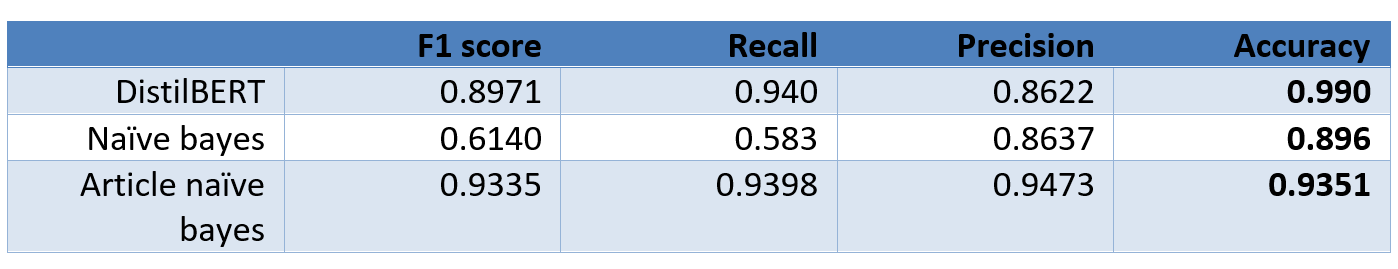

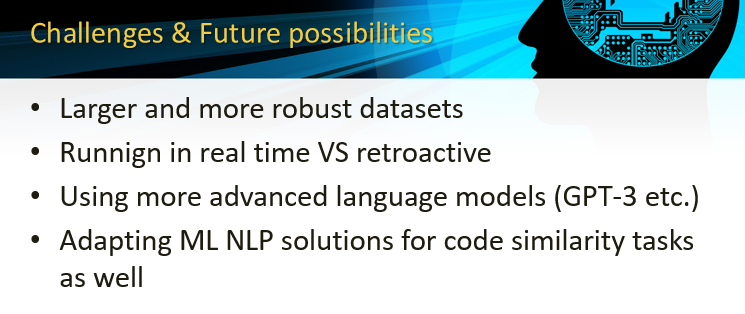

# running on a pretrained model

In [ ]:
calls = ['NtOpenThread', 'ExitWindowsEx', 'FindResourceW', 'CryptExportKey', 'CreateRemoteThreadEx', 'MessageBoxTimeoutW', 'InternetCrackUrlW', 'StartServiceW', 'GetFileSize', 'GetVolumeNameForVolumeMountPointW', 'GetFileInformationByHandle', 'CryptAcquireContextW', 'RtlDecompressBuffer', 'SetWindowsHookExA', 'RegSetValueExW', 'LookupAccountSidW', 'SetUnhandledExceptionFilter', 'InternetConnectA', 'GetComputerNameW', 'RegEnumValueA', 'NtOpenFile', 'NtSaveKeyEx', 'HttpOpenRequestA', 'recv', 'GetFileSizeEx', 'LoadStringW', 'SetInformationJobObject', 'WSAConnect', 'CryptDecrypt', 'GetTimeZoneInformation', 'InternetOpenW', 'CoInitializeEx', 'CryptGenKey', 'GetAsyncKeyState', 'NtQueryInformationFile', 'GetSystemMetrics', 'NtDeleteValueKey', 'NtOpenKeyEx', 'sendto', 'IsDebuggerPresent', 'RegQueryInfoKeyW', 'NetShareEnum', 'InternetOpenUrlW', 'WSASocketA', 'CopyFileExW', 'connect', 'ShellExecuteExW', 'SearchPathW', 'GetUserNameA', 'InternetOpenUrlA', 'LdrUnloadDll', 'EnumServicesStatusW', 'EnumServicesStatusA', 'WSASend', 'CopyFileW', 'NtDeleteFile', 'CreateActCtxW', 'timeGetTime', 'MessageBoxTimeoutA', 'CreateServiceA', 'FindResourceExW', 'WSAAccept', 'InternetConnectW', 'HttpSendRequestA', 'GetVolumePathNameW', 'RegCloseKey', 'InternetGetConnectedStateExW', 'GetAdaptersInfo', 'shutdown', 'NtQueryMultipleValueKey', 'NtQueryKey', 'GetSystemWindowsDirectoryW', 'GlobalMemoryStatusEx', 'GetFileAttributesExW', 'OpenServiceW', 'getsockname', 'LoadStringA', 'UnhookWindowsHookEx', 'NtCreateUserProcess', 'Process32NextW', 'CreateThread', 'LoadResource', 'GetSystemTimeAsFileTime', 'SetStdHandle', 'CoCreateInstanceEx', 'GetSystemDirectoryA', 'NtCreateMutant', 'RegCreateKeyExW', 'IWbemServices_ExecQuery', 'NtDuplicateObject', 'Thread32First', 'OpenSCManagerW', 'CreateServiceW', 'GetFileType', 'MoveFileWithProgressW', 'NtDeviceIoControlFile', 'GetFileInformationByHandleEx', 'CopyFileA', 'NtLoadKey', 'GetNativeSystemInfo', 'NtOpenProcess', 'CryptUnprotectMemory', 'InternetWriteFile', 'ReadProcessMemory', 'gethostbyname', 'WSASendTo', 'NtOpenSection', 'listen', 'WSAStartup', 'socket', 'OleInitialize', 'FindResourceA', 'RegOpenKeyExA', 'RegEnumKeyExA', 'NtQueryDirectoryFile', 'CertOpenSystemStoreW', 'ControlService', 'LdrGetProcedureAddress', 'GlobalMemoryStatus', 'NtSetInformationFile', 'OutputDebugStringA', 'GetAdaptersAddresses', 'CoInitializeSecurity', 'RegQueryValueExA', 'NtQueryFullAttributesFile', 'DeviceIoControl', '__anomaly__', 'DeleteFileW', 'GetShortPathNameW', 'NtGetContextThread', 'GetKeyboardState', 'RemoveDirectoryA', 'InternetSetStatusCallback', 'NtResumeThread', 'SetFileInformationByHandle', 'NtCreateSection', 'NtQueueApcThread', 'accept', 'DecryptMessage', 'GetUserNameExW', 'SizeofResource', 'RegQueryValueExW', 'SetWindowsHookExW', 'HttpOpenRequestW', 'CreateDirectoryW', 'InternetOpenA', 'GetFileVersionInfoExW', 'FindWindowA', 'closesocket', 'RtlAddVectoredExceptionHandler', 'IWbemServices_ExecMethod', 'GetDiskFreeSpaceExW', 'TaskDialog', 'WriteConsoleW', 'CryptEncrypt', 'WSARecvFrom', 'NtOpenMutant', 'CoGetClassObject', 'NtQueryValueKey', 'NtDelayExecution', 'select', 'HttpQueryInfoA', 'GetVolumePathNamesForVolumeNameW', 'RegDeleteValueW', 'InternetCrackUrlA', 'OpenServiceA', 'InternetSetOptionA', 'CreateDirectoryExW', 'bind', 'NtShutdownSystem', 'DeleteUrlCacheEntryA', 'NtMapViewOfSection', 'LdrGetDllHandle', 'NtCreateKey', 'GetKeyState', 'CreateRemoteThread', 'NtEnumerateValueKey', 'SetFileAttributesW', 'NtUnmapViewOfSection', 'RegDeleteValueA', 'CreateJobObjectW', 'send', 'NtDeleteKey', 'SetEndOfFile', 'GetUserNameExA', 'GetComputerNameA', 'URLDownloadToFileW', 'NtFreeVirtualMemory', 'recvfrom', 'NtUnloadDriver', 'NtTerminateThread', 'CryptUnprotectData', 'NtCreateThreadEx', 'DeleteService', 'GetFileAttributesW', 'GetFileVersionInfoSizeExW', 'OpenSCManagerA', 'WriteProcessMemory', 'GetSystemInfo', 'SetFilePointer', 'Module32FirstW', 'ioctlsocket', 'RegEnumKeyW', 'RtlCompressBuffer', 'SendNotifyMessageW', 'GetAddrInfoW', 'CryptProtectData', 'Thread32Next', 'NtAllocateVirtualMemory', 'RegEnumKeyExW', 'RegSetValueExA', 'DrawTextExA', 'CreateToolhelp32Snapshot', 'FindWindowW', 'CoUninitialize', 'NtClose', 'WSARecv', 'CertOpenStore', 'InternetGetConnectedState', 'RtlAddVectoredContinueHandler', 'RegDeleteKeyW', 'SHGetSpecialFolderLocation', 'CreateProcessInternalW', 'NtCreateDirectoryObject', 'EnumWindows', 'DrawTextExW', 'RegEnumValueW', 'SendNotifyMessageA', 'NtProtectVirtualMemory', 'NetUserGetLocalGroups', 'GetUserNameW', 'WSASocketW', 'getaddrinfo', 'AssignProcessToJobObject', 'SetFileTime', 'WriteConsoleA', 'CryptDecodeObjectEx', 'EncryptMessage', 'system', 'NtSetContextThread', 'LdrLoadDll', 'InternetGetConnectedStateExA', 'RtlCreateUserThread', 'GetCursorPos', 'Module32NextW', 'RegCreateKeyExA', 'NtLoadDriver', 'NetUserGetInfo', 'SHGetFolderPathW', 'GetBestInterfaceEx', 'CertControlStore', 'StartServiceA', 'NtWriteFile', 'Process32FirstW', 'NtReadVirtualMemory', 'GetDiskFreeSpaceW', 'GetFileVersionInfoW', 'FindFirstFileExW', 'FindWindowExW', 'GetSystemWindowsDirectoryA', 'RegOpenKeyExW', 'CoCreateInstance', 'NtQuerySystemInformation', 'LookupPrivilegeValueW', 'NtReadFile', 'ReadCabinetState', 'GetForegroundWindow', 'InternetCloseHandle', 'FindWindowExA', 'ObtainUserAgentString', 'CryptCreateHash', 'GetTempPathW', 'CryptProtectMemory', 'NetGetJoinInformation', 'NtOpenKey', 'GetSystemDirectoryW', 'DnsQuery_A', 'RegQueryInfoKeyA', 'NtEnumerateKey', 'RegisterHotKey', 'RemoveDirectoryW', 'FindFirstFileExA', 'CertOpenSystemStoreA', 'NtTerminateProcess', 'NtSetValueKey', 'CryptAcquireContextA', 'SetErrorMode', 'UuidCreate', 'RtlRemoveVectoredExceptionHandler', 'RegDeleteKeyA', 'setsockopt', 'FindResourceExA', 'NtSuspendThread', 'GetFileVersionInfoSizeW', 'NtOpenDirectoryObject', 'InternetQueryOptionA', 'InternetReadFile', 'NtCreateFile', 'NtQueryAttributesFile', 'HttpSendRequestW', 'CryptHashMessage', 'CryptHashData', 'NtWriteVirtualMemory', 'SetFilePointerEx', 'CertCreateCertificateContext', 'DeleteUrlCacheEntryW', '__exception__']
api_calls = {}
for count, i in enumerate(calls):
    api_calls[count] = i 
api_calls

{0: 'NtOpenThread',
 1: 'ExitWindowsEx',
 2: 'FindResourceW',
 3: 'CryptExportKey',
 4: 'CreateRemoteThreadEx',
 5: 'MessageBoxTimeoutW',
 6: 'InternetCrackUrlW',
 7: 'StartServiceW',
 8: 'GetFileSize',
 9: 'GetVolumeNameForVolumeMountPointW',
 10: 'GetFileInformationByHandle',
 11: 'CryptAcquireContextW',
 12: 'RtlDecompressBuffer',
 13: 'SetWindowsHookExA',
 14: 'RegSetValueExW',
 15: 'LookupAccountSidW',
 16: 'SetUnhandledExceptionFilter',
 17: 'InternetConnectA',
 18: 'GetComputerNameW',
 19: 'RegEnumValueA',
 20: 'NtOpenFile',
 21: 'NtSaveKeyEx',
 22: 'HttpOpenRequestA',
 23: 'recv',
 24: 'GetFileSizeEx',
 25: 'LoadStringW',
 26: 'SetInformationJobObject',
 27: 'WSAConnect',
 28: 'CryptDecrypt',
 29: 'GetTimeZoneInformation',
 30: 'InternetOpenW',
 31: 'CoInitializeEx',
 32: 'CryptGenKey',
 33: 'GetAsyncKeyState',
 34: 'NtQueryInformationFile',
 35: 'GetSystemMetrics',
 36: 'NtDeleteValueKey',
 37: 'NtOpenKeyEx',
 38: 'sendto',
 39: 'IsDebuggerPresent',
 40: 'RegQueryInfoKeyW',
 4

In [ ]:
api_calls[1]

'ExitWindowsEx'

In [ ]:
def translateInputs (serials):
  inputs=[]
  for i in serials:
    inputs.append(api_calls[i])
  return inputs

In [ ]:
def trainPreModel (data,path,path2,original):
  #checks if this is the first trainig epoch or not
  if (original):
    #creating a new "clean" DistilBert - with randomized weights
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
  else:   
    model = DistilBertForSequenceClassification.from_pretrained(path)  
  #use cuda - accelerate the training and NN by using GPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  #a default mask for later on using in the teokanizations
  mask = torch.tensor([[1]*100])
  optimizer = AdamW(model.parameters(), lr=1e-5)
  #itereate over all of the training dataset provided
  for index,row in data.iterrows():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    optimizer.zero_grad()
    #extract the label of the current sequence
    label = row['malware']
    labels = (torch.tensor([label]).unsqueeze(0)).to(device)  # Batch size 1
    #extract the current sequence itself
    seq  = row[2:102]
    #create the inputs for the model in an "artificial" way
    #since the data provided is already "tokenized"
    x = " ".join(translateInputs(seq.values))
    inputs = tokenizer(x ,return_tensors="pt")
    #print (inputs)
    #inputs = torch.tensor([translateInputs(seq.values).astype(np.int)])
    inputs = inputs.to(device)
    #inputs = {'input_ids': inputs, 'attention_mask': mask}
    #inputs={key:inputs[key].to(device) for key in inputs}
    #insert the DistilBert model the inputs and the coorect labeling
    #limit the tnsor to 512, since the bert limit
    inputs['input_ids']=inputs['input_ids'][:,:512]
    inputs['attention_mask']=inputs['attention_mask'][:,:512]
    outputs = model(**inputs, labels=labels)
    #preform back propogation each iteration
    loss = outputs[0]
    loss.backward()
    optimizer.step()
  #save the model
  model.save_pretrained(path2)
  return model

In [ ]:
trainData = pd.read_csv(path + 'APIseqTrain.csv')
trainPreModel(trainData,path,path + 'pretrainedmodel',True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
#read the test data
testData = pd.read_csv(path + 'APIseqTest.csv')
print("evaluating model")
result = evaluate(testData, path + 'pretrainedmodel')
display (result)


evaluating model


<ipython-input-5-4f3f8fa8f5d0>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs = torch.tensor([seq.values.astype(np.int)])
<ipython-input-5-4f3f8fa8f5d0>:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  inputs = torch.tensor([seq.values.astype(np.int)])
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:

[0.4937701892016612, 0.487693710118505, 0.5, 0.97538742023701]